<a href="https://colab.research.google.com/github/Rathore25/Reddit-Sentiment-Pre-Post-Covid/blob/main/Visualizing_subreddit_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import os
import json
import codecs
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [107]:
project_dir = '/content/drive/MyDrive/NEU/6120/Final Project/'
subreddits  = ['boston','losangeles','texas','mentalhealth','depression']
periods     = ["Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19","Sep'19","Oct'19","Nov'19","Dec'19",
               "Jan'20","Feb'20","Mar'20","Apr'20","May'20","Jun'20","Jul'20","Aug'20","Sep'20","Oct'20","Nov'20","Dec'20",
               "Jan'21","Feb'21","Mar'21"]

In [108]:
dfs = {}
for subreddit in subreddits:
  dfs[subreddit] = pd.read_csv('{0}{1}_pred.csv'.format(project_dir,subreddit), encoding = 'utf-8-sig')

In [109]:
for subreddit in subreddits:
  length = len(dfs[subreddit])
  dfs[subreddit]['sentiment'] = np.zeros(length)
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.2, ['sentiment']] = 1
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.4, ['sentiment']] = 2
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.6, ['sentiment']] = 3
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.8, ['sentiment']] = 4

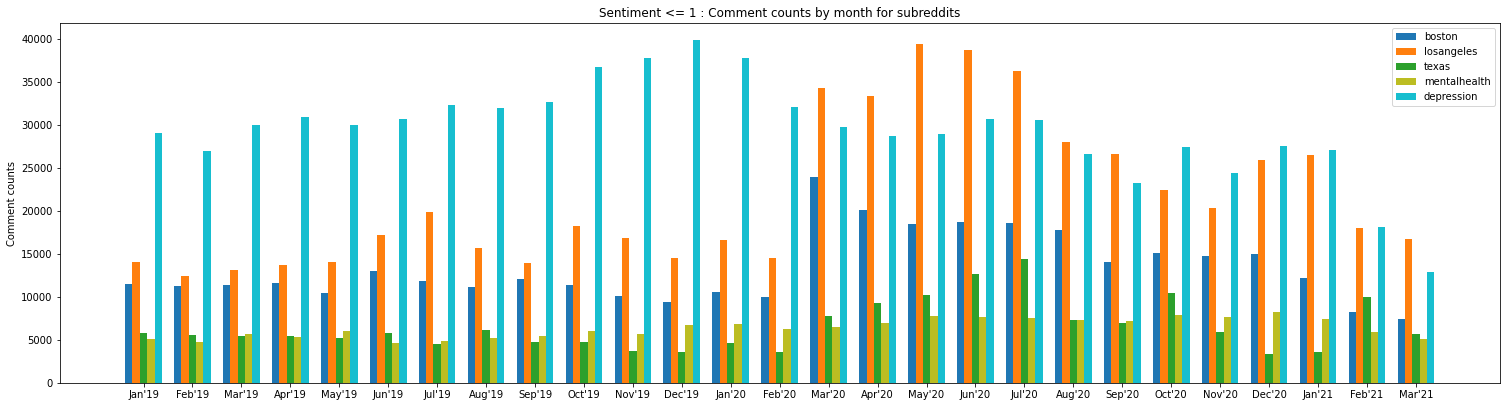

In [111]:
comment_counts = []

for subreddit, df in dfs.items():
  counts = (df[df['sentiment'] <= 1][['period','sentiment']].groupby('period').count()).values
  counts = np.squeeze(counts)
  comment_counts.append(counts)

X   = np.arange(1,28)
fig = plt.figure(figsize=[20,5])
ax  = fig.add_axes([0,0,1,1])
ax.bar(X - 0.30, comment_counts[0], color = 'tab:blue', width = 0.15)
ax.bar(X - 0.15, comment_counts[1], color = 'tab:orange', width = 0.15)
ax.bar(X + 0.00, comment_counts[2], color = 'tab:green', width = 0.15)
ax.bar(X + 0.15, comment_counts[3], color = 'tab:olive', width = 0.15)
ax.bar(X + 0.30, comment_counts[4], color = 'tab:cyan', width = 0.15)
ax.legend(labels=subreddits)
ax.set_ylabel('Comment counts')
ax.set_xticks(X)
ax.set_xticklabels(periods)
ax.set_title("Sentiment <= 1 : Comment counts by month for subreddits")
fig.show()